In [67]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#Imbalancing
from imblearn.over_sampling import SMOTE

#Imputer
from sklearn.impute import SimpleImputer

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score



#Decision tree plot
import pydotplus
import seaborn as sns
from IPython.display import Image

#Models
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Loading the datasets

In [68]:
data = pd.read_csv("./reddit_sentiments_classification_multi_class.csv")

In [69]:
data.head()

stamp coin  avg_post_vote  positive_posts  \
0  2021-04-01 00:00:00.000000  BTC            1.0               5   
1  2021-04-01 01:00:00.000000  BTC            1.0               5   
2  2021-04-01 02:00:00.000000  BTC            1.0               6   
3  2021-04-01 03:00:00.000000  BTC            1.0               2   
4  2021-04-01 04:00:00.000000  BTC            1.0               2   

   negative_posts  avg_comment_vote  positive_comments  negative_comments  \
0               2              1.00                 15                 17   
1               1              1.34                 26                  8   
2               2              1.50                 22                 11   
3               0              1.34                 31                  8   
4               1              1.27                 30                 10   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [70]:
# drop first column because its sudo primary key
data = data.iloc[1:,2:]
data.head(10).style

In [71]:
data.describe().T

count       mean       std   min    25%    50%    75%  \
avg_post_vote      1616.0   1.030528  0.222082  0.75   1.00   1.00   1.00   
positive_posts     1616.0   3.939356  2.925923  0.00   2.00   3.00   5.00   
negative_posts     1616.0   1.651609  1.748393  0.00   0.00   1.00   2.00   
avg_comment_vote   1616.0   2.634379  2.046001  0.00   1.60   2.24   3.03   
positive_comments  1616.0  22.588490  4.688524  0.00  19.75  23.00  26.00   
negative_comments  1616.0  10.950495  3.448340  0.00   9.00  11.00  13.00   
class              1616.0   0.325495  0.664346  0.00   0.00   0.00   0.00   

                         max  
avg_post_vote       7.470588  
positive_posts     23.000000  
negative_posts     18.000000  
avg_comment_vote   37.530000  
positive_comments  37.000000  
negative_comments  25.000000  
class               2.000000

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 1 to 1616
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_post_vote      1616 non-null   float64
 1   positive_posts     1616 non-null   int64  
 2   negative_posts     1616 non-null   int64  
 3   avg_comment_vote   1616 non-null   float64
 4   positive_comments  1616 non-null   int64  
 5   negative_comments  1616 non-null   int64  
 6   class              1616 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 88.5 KB


# Data Visualization

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


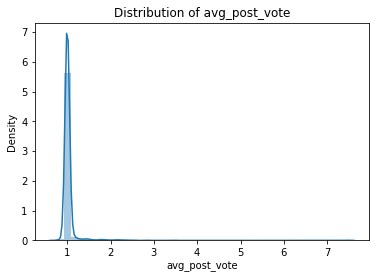

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


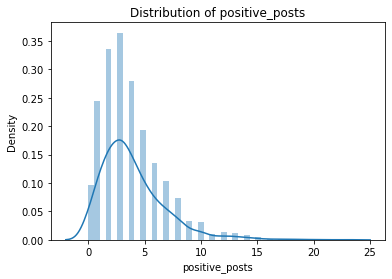

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


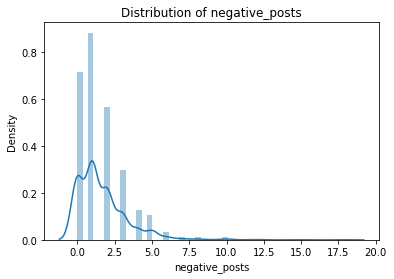

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


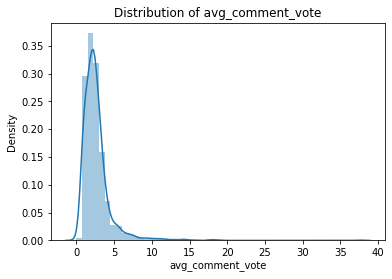

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


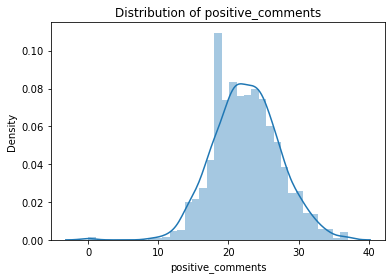

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


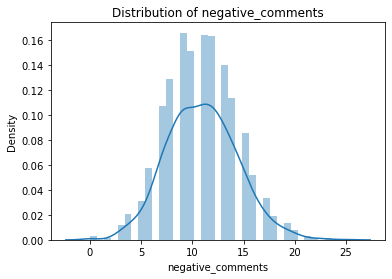

In [49]:
numeric_cols_to_distribute = ['avg_post_vote','positive_posts','negative_posts','avg_comment_vote','positive_comments','negative_comments']
for col in data[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(data[col])
    plt.show()

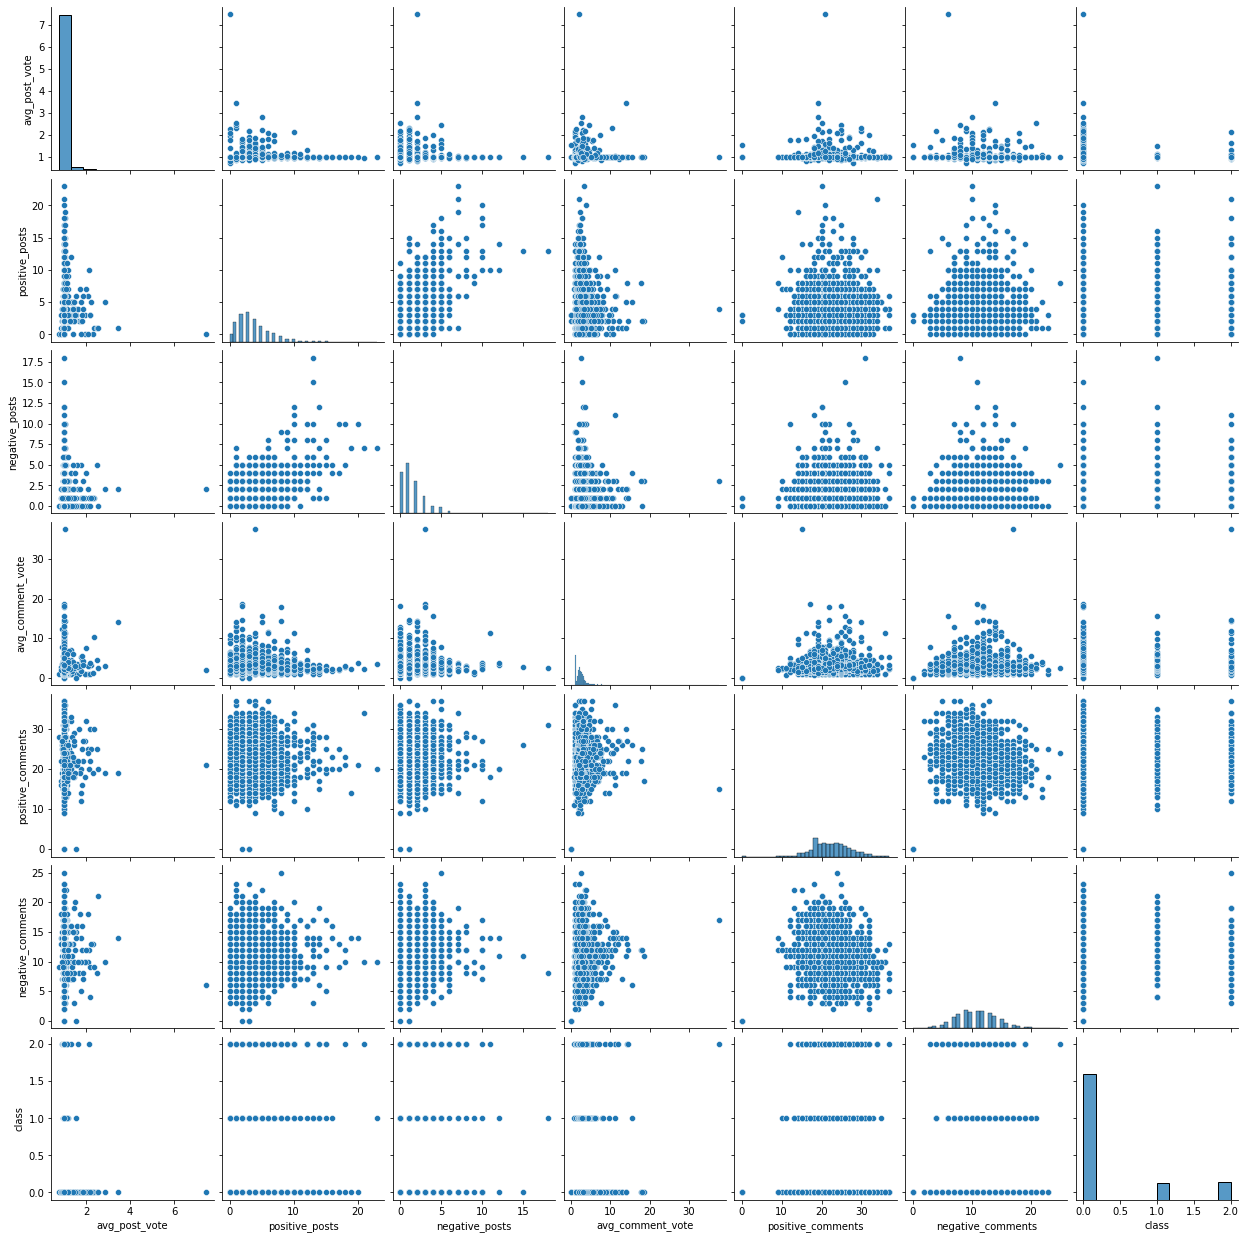

In [50]:
sns.pairplot(data)
plt.show()

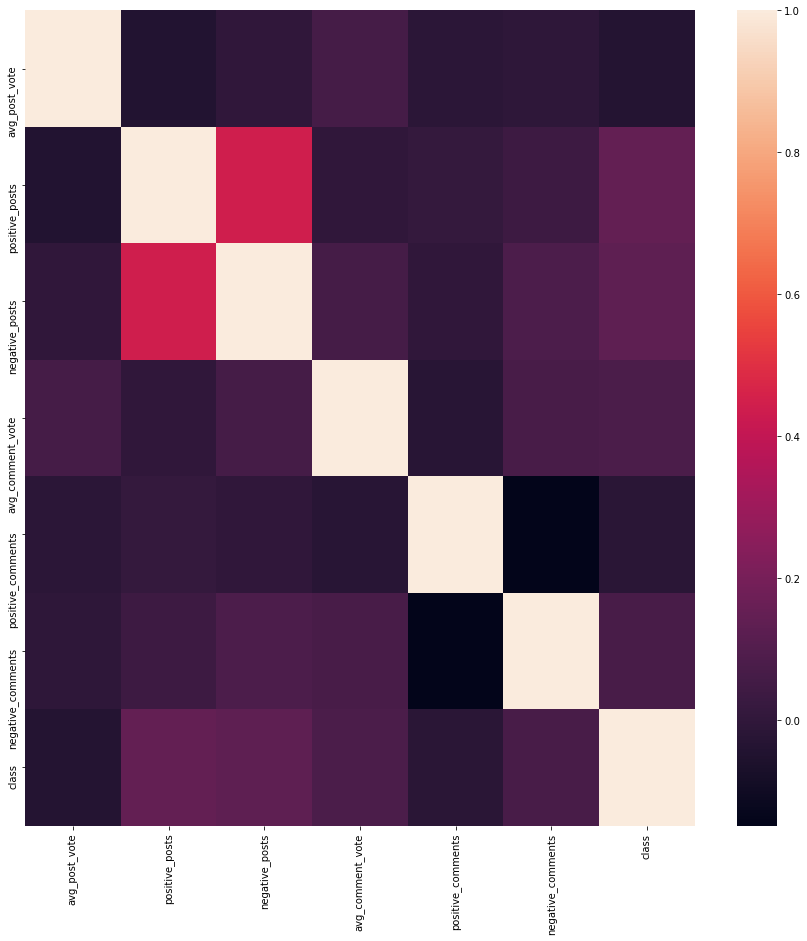

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr())
plt.show()

# Preprocessing Data

In [52]:
train, target = data.loc[:, data.columns != 'class'], data['class'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3) #split data 70:30

In [53]:
X_train

avg_post_vote  positive_posts  negative_posts  avg_comment_vote  \
1019       1.000000               7               2              3.55   
290        1.000000               2               0              1.63   
994        1.000000               2               2              1.33   
950        1.111111               7               0              1.59   
1161       1.080000               5               3              3.55   
...             ...             ...             ...               ...   
12         1.000000               1               0              1.00   
621        1.000000               5               1              3.28   
189        1.031250               7               0              1.00   
138        1.000000               5               0              1.00   
437        1.021277               6               3              2.45   

      positive_comments  negative_comments  
1019                 16                 16  
290                  22                  7  
994                  21                  8  
950                  25                 11  
1161                 13                 22  
...                 ...                ...  
12                   27                 16  
621                  27                 15  
189                  19                  9  
138                  24                  9  
437                  21                  8  

[1131 rows x 6 columns]

In [54]:
y_train

1019    1
290     0
994     0
950     0
1161    0
       ..
12      0
621     0
189     0
138     0
437     0
Name: class, Length: 1131, dtype: int64

# Model Training and Accuracy

In [55]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_order = np.array([train.columns.values])
    i = np.argsort(importances)[::-1]
    feature_order = feature_order[:,i]
    plt.figure()
    plt.title("Relative feature importances")
    plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
    plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
    plt.xlim([-1, train.shape[1]])
    plt.show()

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

## Decision Tree

F1 score is:  0.777319587628866
Accuracy is:  77.73


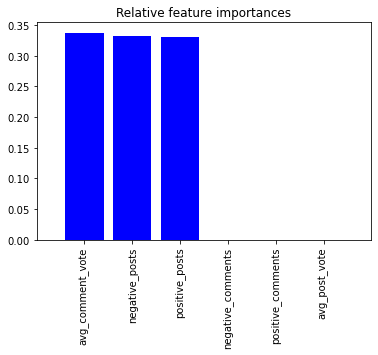

In [57]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train)

pred_DT = clf.predict(X_test)
pred_DT_probs = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT,average='micro')))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT)*100).round(2))

feature_importance(clf)

## Logistic Regression

F1 score is:  0.7855670103092782
Accuracy is:  78.56


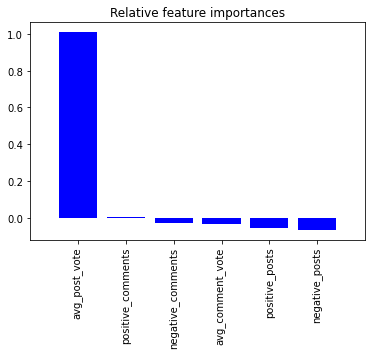

In [58]:
lr_imb = LogisticRegression(solver='lbfgs',max_iter=100000).fit(X_train, y_train)
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,y_pred_lr_imb,average = 'micro')))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

importances = lr_imb.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

## XGBClassifier

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:21:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


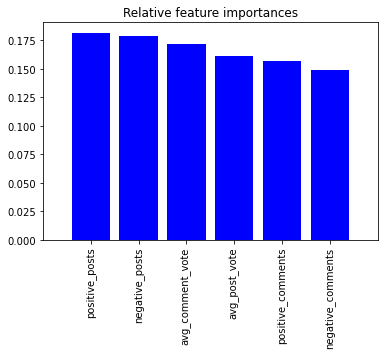

F1 score is:  0.7402061855670102
Accuracy is:  74.02


In [59]:
model = XGBClassifier().fit(X_train, y_train)

pred_XGB = model.predict(X_test)
pred_XGB_prob = model.predict_proba(X_test)
feature_importance(model)

print ("F1 score is: ", (f1_score(y_test,pred_XGB,average = 'micro')))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB)*100).round(2))
# model.score(X_test, y_test)

## Naive bayes

In [60]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

pred_nb = model_nb.predict(X_test)
pred_NB_prob = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb,average = 'micro')))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.6
Accuracy is:  60.0


## SVC

In [61]:
# model_svc = SVC(kernel = "poly", probability=True)
# model_svc.fit(X_train, y_train)

# pred_svc = model_svc.predict(X_test)
# pred_svc_prob = model_svc.predict_proba(X_test)

# print ("F1 score is: ", (f1_score(y_test,pred_svc)))
# print ("Accuracy is: ", (accuracy_score(y_test,pred_svc)*100).round(2))
# # model_svc.score(X_test, y_test)

## Random Forest

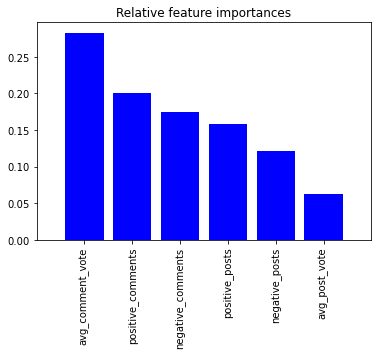

F1 score is:  0.7835051546391752
Accuracy is:  78.35


In [62]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
pred_RF_prob = model_rf.predict_proba(X_test)
feature_importance(model_rf)

print ("F1 score is: ", (f1_score(y_test,pred_rf,average = 'micro')))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf)*100).round(2))
# model_rf.score(X_test, y_test)

## Ensemble

In [63]:
model_voting = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('gnb', model_nb),
        ('xgb', model),
    ],voting='soft')

pipe = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred,average = 'micro')))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.7670103092783506
Accuracy is:  76.7


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [64]:
# n_classes = 3

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predProba_lr_imb[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [65]:
# plt.figure(figsize=(12,10))

# for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_imb[:,1], pred_XGB_prob[:,1], pred_NB_prob[:,1], pred_RF_prob[:,1], y_pred_prob[:,1], pred_XGB_prob[:,1]], ['Logistic Regression','XGBClassifier', 'Naive Bayes', 'Random Forest','Model Ensemble', 'Decision Tree']):
#     fpr, tpr, _ = roc_curve(test, pred)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
#     plt.legend(loc='best')
#     plt.plot([0,1],[0,1],color='black', linestyle='--')

# plt.title('ROC curve (Receiver Operating Characteristic)')    
# plt.ylabel('True Positive Rate (TPR)')
# plt.xlabel('False Positive Rate (FPR)')

# plt.show()

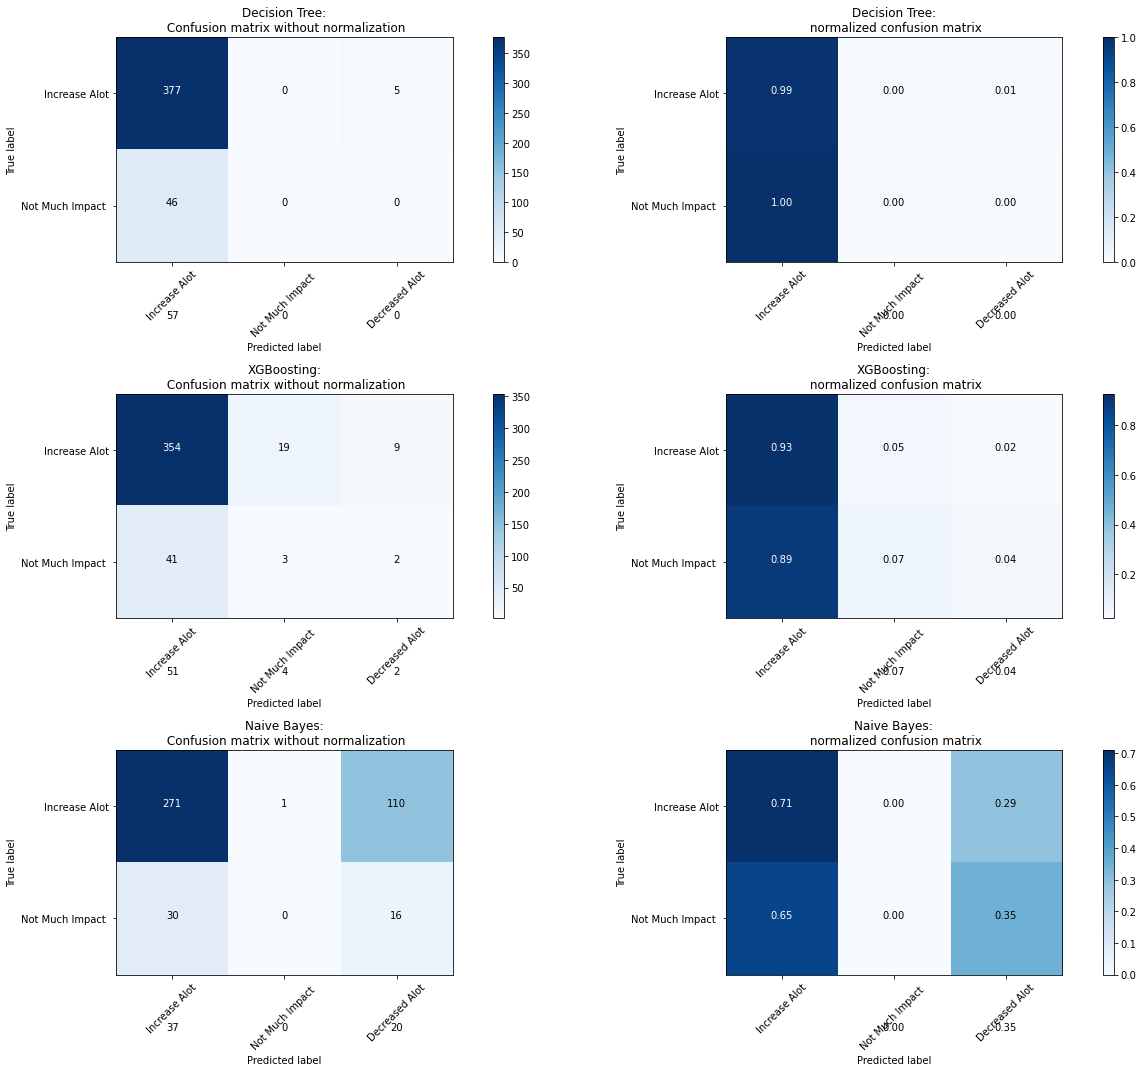

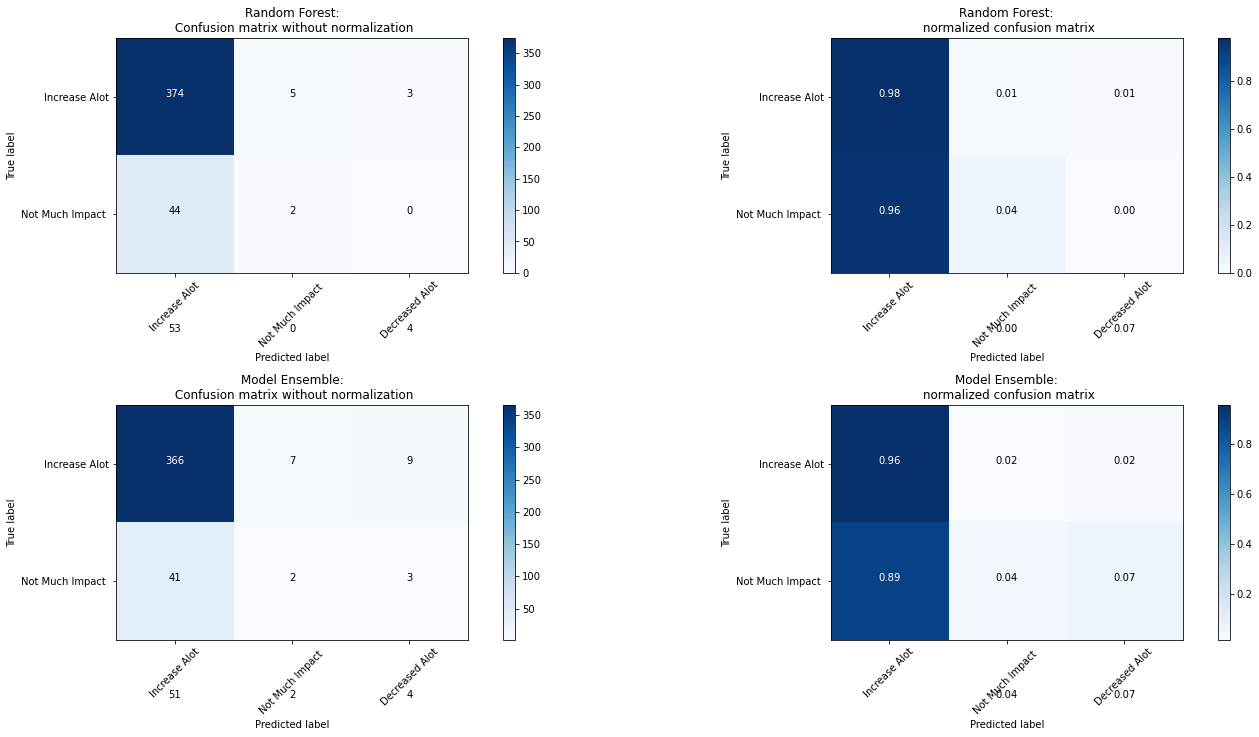

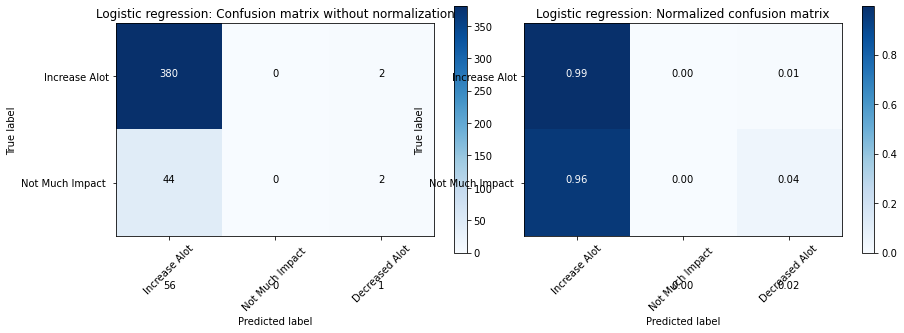

In [66]:
# Compute confusion matrix
class_names = ['Increase Alot', 'Not Much Impact ', 'Decreased Alot']
cnf_matrix_clf = confusion_matrix(y_test, pred_DT)
cnf_matrix_XGB = confusion_matrix(y_test, pred_XGB) 
cnf_matrix_NB = confusion_matrix(y_test, pred_nb) 
# cnf_matrix_svm = confusion_matrix(y_test, pred_svc)
cnf_matrix_RF = confusion_matrix(y_test, pred_rf)
cnf_matrix_ensemble = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names,
                      title='Decision Tree:\n Confusion matrix without normalization')

#Plot Decision Tree normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names, normalize=True,
                      title='Decision Tree:\n normalized confusion matrix')


#Plot XGB confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names,
                      title='XGBoosting:\n Confusion matrix without normalization')

#Plot XGB normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names, normalize=True,
                      title='XGBoosting:\n normalized confusion matrix')

#Plot Naive Bayes confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names,
                      title='Naive Bayes:\n Confusion matrix without normalization')

#Plot Naive Bayes normalized onfusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names, normalize=True,
                      title='Naive Bayes:\n normalized confusion matrix')
plt.show()

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot SVM confusion matrix
# plt.subplot(321) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
#                       title='SVM:\n Confusion matrix without normalization')

# #Plot SVM normalized confusion matrix
# plt.subplot(322) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
#                       title='SVM:\n normalized confusion matrix')

#Plot RF confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names,
                      title='Random Forest:\n Confusion matrix without normalization')

#Plot RF normalized confusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names, normalize=True,
                      title='Random Forest:\n normalized confusion matrix')

#Plot Model Ensemble confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names,
                      title='Model Ensemble:\n Confusion matrix without normalization')

#Plot Model Ensemble normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names, normalize=True,
                      title='Model Ensemble:\n normalized confusion matrix')


plt.show()

cnf_matrix = confusion_matrix(y_test, y_pred_lr_imb)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic regression: Confusion matrix without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic regression: Normalized confusion matrix')


plt.show()